In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
from warnings import filterwarnings



Index(['rowid', 'pl_letter', 'pl_discmethod', 'pl_controvflag', 'pl_pnum',
       'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim',
       'pl_orbsmaxlim',
       ...
       'st_jmh2err', 'st_jmh2lim', 'st_hmk2', 'st_hmk2err', 'st_hmk2lim',
       'st_jmk2', 'st_jmk2err', 'st_jmk2lim', 'st_colorn', 'habitable'],
      dtype='object', length=146)

In [7]:

randFeatGroups=pd.read_csv("../randomFeatureGroupings.csv")
randFeatGroups['index']=randFeatGroups.index

scoresOnly=pd.read_csv("../Scores.csv")

data=scoresOnly.merge(randFeatGroups,on='index')
data=data.dropna()

#Sort the data by the score with the highest values at the top
data=data.sort_values(by="score",ascending=False)
data=data.reset_index().drop("level_0",axis="columns")
data


,index,score,features
0,4375,0.906250,"gaia_dist,gaia_disterr1,gaia_gmaglim,gaia_plxe..."
1,2919,0.882353,"gaia_distlim,gaia_plxerr1,gaia_pmlim,pl_locale..."
2,7334,0.880952,"gaia_distlim,gaia_gmaglim,gaia_plx,pl_controvf..."
3,5440,0.875000,"gaia_disterr1,gaia_distlim,gaia_gmaglim,gaia_p..."
4,7131,0.875000,"dec,gaia_disterr2,gaia_gmag,gaia_gmaglim,gaia_..."
...,...,...,...
7255,7540,0.500000,"dec,gaia_dist,gaia_disterr1,gaia_disterr2,gaia..."
7256,819,0.500000,"st_dist,st_pmdecerr,st_teff,st_wise3lim"
7257,8096,0.491525,"st_elat,st_h,st_metfe,st_naxa,st_pmdecerr,st_w..."
7258,5507,0.487805,"dec,gaia_distlim,gaia_pmdecerr,gaia_pmlim,pl_k..."


In [15]:
#Get all the groupings with accuracies greater than 70
top=data[data.score>0.70]
#Dictionary to hold importance score of each feature
ImportanceScores={}


def CalcImpScore(currFeat,Set=data):
    count=0
    score=0
    for recordNumber in Set.index:
        if(currFeat in Set.features.iloc[recordNumber].split(",")):
            score+=Set.score.iloc[recordNumber]
            count+=1
    return score/count

def GetImpScore(feat,Set=data):
    global ImportanceScores
    features=[x.strip() for x in feat.split(",") if ("err" not in x and "lim" not in x and x!='pl_st_nref' and x!='pl_locale')]
    for feature in features:
        if feature not in ImportanceScores and feature in trainCols:
            ImportanceScores[feature]=CalcImpScore(feature)

top.features.apply(lambda x: GetImpScore(x))

#Number of mostImportantFeatures to be displayed
numTop=20

#Get a list of the features sorted by their importance with highest importance features first
ImportantFeats=sorted(ImportanceScores,key=ImportanceScores.get)
ImportantFeats.reverse()

MostImportant=ImportantFeats[:numTop]

In [10]:
#Number of mostImportantFeatures to be displayed
numTop=20
numTrend=10

ImportantFeats=sorted(ImportanceScores,key=ImportanceScores.get)
ImportantFeats.reverse()
MostImportant=ImportantFeats[:numTop]
trendFreq={}
trends={}
# print(Frequency)
# sortedFreq={}

# def ScoreAndFreq(entry,Set,currItem):
#     global trendFreq
#     items=[x.strip() for x in entry.split(",") if ("err" not in x and "lim" not in x and x!='pl_st_nref' and x!='pl_locale' and x!=currItem)]
#     for item in items:
#         if item not in trendFreq:
#             trendFreq[item]=Set.score[Set.features.str.contains(item)].sum()/len(Set.score[Set.features.str.contains(item)])

# for n in bestOverall:
#     selection=data[data.features.str.contains(n)]
#     trendFreq={}
#     selection.features.apply(lambda x:ScoreAndFreq(x,selection,n))
#     trendBest=sorted(trendFreq,key=trendFreq.get)
#     trendBest.reverse()
#     trendBest=trendBest[:numTrend]
#     out={}
#     for feat in trendBest:
#         out[feat]=trendFreq[feat]
#     trends[n]=out
        

In [11]:
plt.figure(figsize=(12,10))
print(Frequency[:10])
y=[ImportanceScores[x] for x in Frequency[0:15]]
fig=plt.plot(Frequency[0:15],y)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Important Feature",fontsize=20)
plt.ylabel("Importance Score",fontsize=20)
plt.savefig("mostImportant.jpg")

NameError: name 'Frequency' is not defined

<Figure size 864x720 with 0 Axes>

In [8]:
for n in Frequency[:15]:
    print('# Important feature being considered:',"__"+n+"__",'\n')
    print("Trend Feature: Trend Score\n")
    num=1
    for m in trends[n]:
        print(str(num)+".",end=" ")
        print(m,":",trends[n][m])
        num+=1

# Important feature being considered: __ra__ 

Trend Feature: Trend Score

1. gaia_plx : 0.6244381788498952
2. st_j : 0.624066983328977
3. gaia_pm : 0.6239822548229476
4. st_pm : 0.6237129873406728
5. dec : 0.6229651770606066
6. pl_rads : 0.6214636178556403
7. st_h : 0.6209865130071113
8. st_rad : 0.6209783628714165
9. st_wise1 : 0.6207891160727166
10. st_logg : 0.6207789817080969
# Important feature being considered: __st_j__ 

Trend Feature: Trend Score

1. ra : 0.624066983328977
2. gaia_plx : 0.6207593107567956
3. gaia_pm : 0.6203736439350269
4. st_pm : 0.6200597766361728
5. st_jmh2 : 0.6198694651722013
6. dec : 0.6195830896823542
7. st_jmk2 : 0.6191669595824888
8. pl_orbper : 0.6181311321258534
9. st_h : 0.6180637232609615
10. st_logg : 0.6178187116917325
# Important feature being considered: __gaia_plx__ 

Trend Feature: Trend Score

1. ra : 0.6244381788498952
2. gaia_pm : 0.6207701911366931
3. st_j : 0.6207593107567956
4. st_pm : 0.6203453403820248
5. dec : 0.6197886776285098
6. 

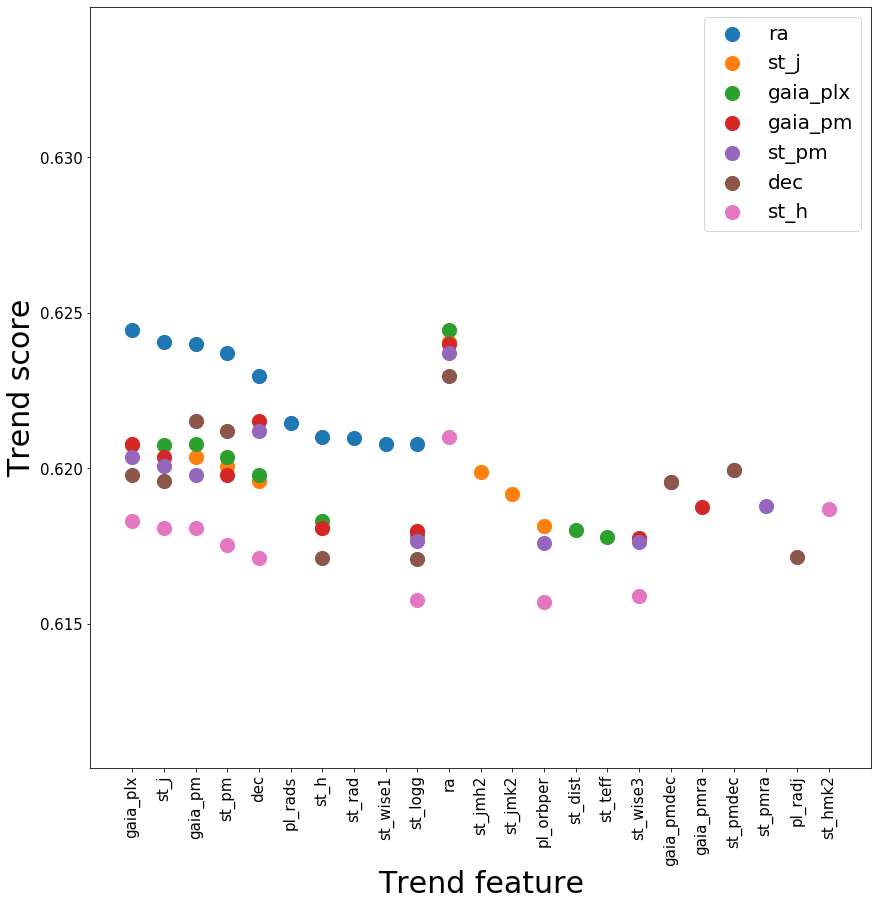

In [72]:
num=1
Fig=1
fig=plt.figure(figsize=(14,14))
# fig.set_width=10
# fig.set_height=40
# fig.add_subplot(2,5)
labels=Frequency[0:7]

for n in labels:
    c=pd.DataFrame({"feats":list(trends[n].keys())})
    c['score']=c.feats.apply(lambda x:trends[n][x])
    plt.subplot().scatter(c.feats,c.score,marker=MarkerStyle(marker=".", fillstyle=None),s=800)
#     plt.title(n,fontsize=20)
    plt.xlabel("Trend feature",fontsize=30)
    plt.ylabel("Trend score",fontsize=30)
    plt.xticks(rotation=90,fontsize=15)
    plt.yticks(fontsize=15)

plt.subplot().legend(labels,prop={'size': 20})
plt.savefig("TrendFeatures.jpg")
filterwarnings('ignore')